In [1]:
%matplotlib inline

# Data analysis of What the Street!? user guesses

This notebook analyzes all user guesses of mobility inequality, as collected via What the Street!?, for the paper "Crowdsourced Quantification and Visualization of Urban Mobility Space Inequality".

Last update: 2017-10-08  
Contact: michael.szell@gmail.com, szellm@ceu.edu (Michael Szell)

## Parameters

In [2]:
pathdata = "data/"
citynames = sorted(["stuttgart", "berlin", "barcelona", "amsterdam","boston","losangeles","newyork","portland","sanfrancisco","vienna","beijing", "budapest", "chicago", "copenhagen", "helsinki", "hongkong", "jakarta", "johannesburg", "london", "moscow", "rome", "singapore", "tokyo"])
print('[%s]' % ', '.join(map(str, citynames)))

[amsterdam, barcelona, beijing, berlin, boston, budapest, chicago, copenhagen, helsinki, hongkong, jakarta, johannesburg, london, losangeles, moscow, newyork, portland, rome, sanfrancisco, singapore, stuttgart, tokyo, vienna]


## Imports

In [3]:
import re, sys
import collections
import numpy as np
import json
import pprint
pp = pprint.PrettyPrinter(indent=4)

from numpy import log10
from collections import Counter

from scipy.stats.stats import pearsonr

# plotting stuff
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

## Data import

In [4]:
# Initialize cityinfo
with open(pathdata + "cityMeta.json") as data_file:  
    citymeta = json.load(data_file)

cityinfo = {}
for cityname in citynames:
    temp = citymeta[cityname]
    s = temp['moving']['car']['area'] + temp['parking']['car']['offStreet']['area'] + temp['moving']['bike']['area'] + temp['parking']['bike']['area'] + temp['moving']['rail']['area'] + temp['parking']['rail']['area'] 
    cityinfo[cityname] = {}
    temp2 = [temp['moving']['car']['area']+temp['parking']['car']['offStreet']['area'], temp['moving']['rail']['area'] + temp['parking']['rail']['area'], temp['moving']['bike']['area'] + temp['parking']['bike']['area'] ]
    cityinfo[cityname]['areas'] = [round(x/s, 2) for x in temp2]
    cityinfo[cityname]['name'] = temp['name']
    
pp.pprint(cityinfo)
print('[%s]' % ', '.join(map(str, [cityinfo[cityname]['name'] for cityname in citynames])))

{   'amsterdam': {'areas': [0.57, 0.24, 0.19], 'name': 'Amsterdam'},
    'barcelona': {'areas': [0.76, 0.18, 0.06], 'name': 'Barcelona'},
    'beijing': {'areas': [0.68, 0.29, 0.03], 'name': 'Beijing'},
    'berlin': {'areas': [0.78, 0.15, 0.07], 'name': 'Berlin'},
    'boston': {'areas': [0.83, 0.13, 0.04], 'name': 'Boston'},
    'budapest': {'areas': [0.77, 0.21, 0.03], 'name': 'Budapest'},
    'chicago': {'areas': [0.81, 0.16, 0.03], 'name': 'Chicago'},
    'copenhagen': {'areas': [0.73, 0.12, 0.16], 'name': 'Copenhagen'},
    'helsinki': {'areas': [0.63, 0.12, 0.26], 'name': 'Helsinki'},
    'hongkong': {'areas': [0.85, 0.12, 0.04], 'name': 'Hong Kong'},
    'jakarta': {'areas': [0.96, 0.04, 0.0], 'name': 'Jakarta'},
    'johannesburg': {'areas': [0.95, 0.04, 0.01], 'name': 'Johannesburg'},
    'london': {'areas': [0.72, 0.24, 0.04], 'name': 'London'},
    'losangeles': {'areas': [0.94, 0.04, 0.02], 'name': 'Los Angeles'},
    'moscow': {'areas': [0.7, 0.29, 0.01], 'name': 'Moscow'

In [5]:
# Read data
guessdata = {}
for cityname in citynames:
    with open(pathdata + 'guessdata_' + cityname + '.txt', 'rb') as fp:
        guessarray = np.loadtxt(fp)
        guessdata[cityname] = guessarray

## Plots

In [ ]:
# Plot all info

x = [1, 2, 3]
for cityname in citynames:
    
    # http://blog.bharatbhole.com/creating-boxplots-with-matplotlib/
    
    # Create a figure instance
    fig = plt.figure(1, figsize=(9, 6))

    # Create an axes instance
    ax = fig.add_subplot(111)

    # Create the boxplot
    bp = ax.boxplot(guessdata[cityname])
    
    y = np.mean(guessdata[cityname], axis=0)
    e = np.std(guessdata[cityname], axis=0)
    plt.scatter(x, cityinfo[cityname]['areas'], c=[4]*len(x), s=80)
    plt.title(cityinfo[cityname]['name'])
    ax.set_xticklabels(["Car", "Rail", "Bike"])
    plt.ylim([0,1])
    plt.show()

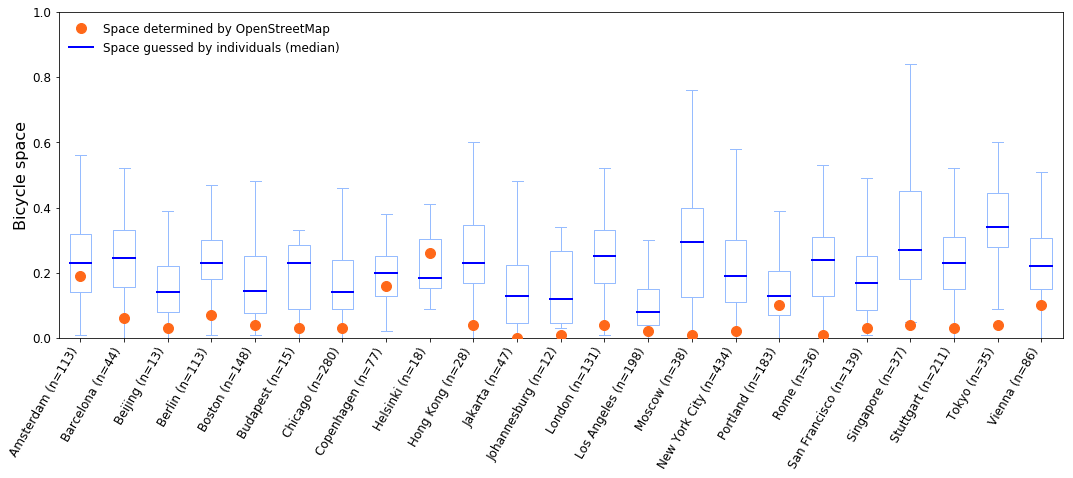

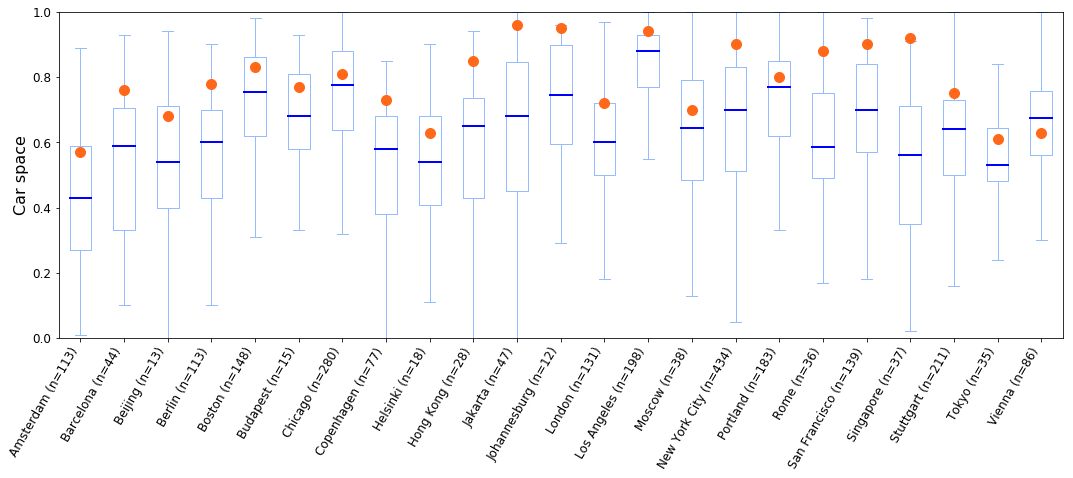

In [14]:
# Boxplots for all cities

x = list(range(0,len(cityinfo)))
x = [temp+1 for temp in x]
carareas = []
cardata = []
bikeareas = []
bikedata = []
totalguesses = 0
for cityname in citynames:
    carareas.append(cityinfo[cityname]['areas'][0])
    cardata.append(guessdata[cityname][:,0])
    bikeareas.append(cityinfo[cityname]['areas'][2])
    bikedata.append(guessdata[cityname][:,2])
    totalguesses += len(guessdata[cityname][:,0])

    

# Bike plot
# http://blog.bharatbhole.com/creating-boxplots-with-matplotlib/
# Create a figure instance
fig = plt.figure(1, figsize=(18, 6))
# Create an axes instance
ax = fig.add_subplot(111)
# Create the boxplot
bp = ax.boxplot(bikedata)
for median in bp['medians']:
    median.set(color='#0000FF', linewidth=2)
for box in bp['boxes']:
    # change outline color
    box.set( color='#96BCFF', linewidth=1)
## change color and linewidth of the whiskers
for whisker in bp['whiskers']:
    whisker.set(color='#96BCFF', linewidth=1)
## change color and linewidth of the caps
for cap in bp['caps']:
    cap.set(color='#96BCFF', linewidth=1)
## change the style of fliers and their fill
for flier in bp['fliers']:
    flier.set(marker='o', color='#96BCFF', alpha=0)
    
#plt.title(cityinfo[cityname]['name'])
plt.ylim([0,1])
plt.scatter(x, bikeareas, color="#FF6819", s=100, zorder=1000)
red_dot, = plt.plot(0, "o", color="#FF6819", markersize=10)
red_line = mlines.Line2D([], [], color='blue', marker='', linewidth=2)
plt.legend([red_dot, red_line], ['Space determined by OpenStreetMap', 'Space guessed by individuals (median)'], prop={'size': 12}, loc=2,frameon=False)
labels = [cityinfo[cityname]['name']+ " (n=" + str(len(guessdata[cityname][:,2]))+ ")" for cityname in citynames]
ax.set_xticklabels(labels, fontsize=12, ha='right')
plt.ylabel("Bicycle space", fontsize=16)
plt.xticks(rotation=60)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.show()



# Car plot
# http://blog.bharatbhole.com/creating-boxplots-with-matplotlib/
# Create a figure instance
fig = plt.figure(1, figsize=(18, 6))
# Create an axes instance
ax = fig.add_subplot(111)
# Create the boxplot
bp = ax.boxplot(cardata)
for median in bp['medians']:
    median.set(color='#0000FF', linewidth=2)
for box in bp['boxes']:
    # change outline color
    box.set( color='#96BCFF', linewidth=1)
## change color and linewidth of the whiskers
for whisker in bp['whiskers']:
    whisker.set(color='#96BCFF', linewidth=1)
## change color and linewidth of the caps
for cap in bp['caps']:
    cap.set(color='#96BCFF', linewidth=1)
## change the style of fliers and their fill
for flier in bp['fliers']:
    flier.set(marker='o', color='#96BCFF', alpha=0)
    
#plt.title(cityinfo[cityname]['name'])
plt.ylim([0,1])
#labels = [cityinfo[cityname]['name']+"\n"+"n = "+str(len(guessdata[cityname][:,0])) for cityname in citynames]
labels = [cityinfo[cityname]['name']+ " (n=" + str(len(guessdata[cityname][:,2]))+ ")" for cityname in citynames]
plt.scatter(x, carareas, color="#FF6819", s=100, zorder=1000)
ax.set_xticklabels(labels, fontsize=12, ha='right')
plt.ylabel("Car space", fontsize=16)
plt.xticks(rotation=60)

plt.tick_params(axis='both', which='major', labelsize=12)
plt.show()
#plt.savefig('carguesses.png', bbox_inches='tight')






## Numeric results

In [8]:
# Total guesses
print(str(totalguesses))

2436


In [12]:
# Correlations
print(pearsonr([np.median(c) for c in cardata], carareas))
print(pearsonr([np.median(c) for c in bikedata], bikeareas))

(0.63025187010867145, 0.0012664585408648323)
(0.043782754961952809, 0.84276357190837836)


In [9]:
# Miscellaneous
print(str(np.std(guessdata["amsterdam"][:,0])))
print(str(cityinfo["vienna"]['areas'][0]))
print(guessdata["vienna"][:,0])

0.214917658214
0.63
[ 0.58  0.87  0.38  0.78  0.6   0.57  0.68  0.53  0.71  0.81  0.77  0.8   1.
  0.67  0.3   0.7   0.47  0.82  0.7   0.7   0.62  0.04  0.39  0.66  0.57
  0.52  0.49  0.92  0.58  0.81  0.6   0.75  0.79  0.73  0.6   0.42  0.51
  0.86  0.56  0.69  0.85  0.32  0.55  0.73  0.23  0.74  0.85  0.8   0.71
  0.89  0.56  0.4   0.33  0.78  0.7   0.71  0.54  0.58  0.66  0.14  0.74
  0.59  0.71  0.84  0.73  0.7   0.62  0.82  0.66  0.81  0.72  0.38  0.76
  0.66  0.59  0.    0.6   0.6   0.69  0.68  0.76  0.6   0.97  0.72  0.37
  0.34]
